# NYC Geocoding Data - Exploratory Data Analysis

This notebook explores the NYC address points dataset from NYC Open Data.

In [1]:
import json
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

## 1. Load Data

In [2]:
DATA_PATH = Path("../data/nyc_geocoding_raw.json")

with open(DATA_PATH) as f:
    raw_data = json.load(f)

print(f"Total records: {len(raw_data):,}")

Total records: 967,827


In [3]:
# Convert to DataFrame
df = pd.DataFrame(raw_data)

# Extract coordinates from the_geom
df['longitude'] = df['the_geom'].apply(lambda x: x['coordinates'][0] if isinstance(x, dict) else None)
df['latitude'] = df['the_geom'].apply(lambda x: x['coordinates'][1] if isinstance(x, dict) else None)

print(f"DataFrame shape: {df.shape}")
df.head()

DataFrame shape: (967827, 37)


,the_geom,bin,zipcode,post_type,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_sbqj_enih,:@computed_region_92fq_4b7q,objectid,addresspointid,house_number,hyphen_type,sosindicator,address_source,validation,boroughcode,collectionmethod,created_date,b7sc_actual,street_name,full_street_name,pre_directional,modified_date,address_status,complexid,post_modifier,a4id,house_number_range,house_number_suffix,pre_type,special_condition,post_directional,house_number_range_suffix,pre_modifier,b7sc_vanity,longitude,latitude
0,"{'type': 'Point', 'coordinates': [-73.92222893...",3073598,11237,ST,42,2,53,37,1565245,3097694,852,N,2,4,3,3,A,2009-02-13T00:00:00.000Z,34763001,HART,HART ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-73.922229,40.702298
1,"{'type': 'Point', 'coordinates': [-73.99639058...",3007945,11231,PL,14,2,48,27,1316223,3010064,127,N,1,4,3,3,A,2009-02-13T00:00:00.000Z,30533001,3,3 PL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-73.996391,40.678513
2,"{'type': 'Point', 'coordinates': [-73.97084351...",3191598,11223,ST,32,2,36,45,1707535,3242930,2078,N,2,4,3,3,A,2009-02-13T00:00:00.000Z,33483001,1,E 1 ST,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-73.970844,40.597941
3,"{'type': 'Point', 'coordinates': [-73.98411986...",3347775,11215,ST,14,2,50,27,1645370,3026140,330,N,2,4,3,3,A,2009-02-13T00:00:00.000Z,30523001,2,2 ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-73.984120,40.673909
4,"{'type': 'Point', 'coordinates': [-73.98106282...",3021738,11215,ST,14,2,50,27,1531000,3027103,460,N,2,4,3,3,A,2009-02-13T00:00:00.000Z,30573001,6,6 ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-73.981063,40.669054


## 2. Data Overview

In [5]:
# Column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967827 entries, 0 to 967826
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   the_geom                     967827 non-null  object 
 1   bin                          967822 non-null  object 
 2   zipcode                      967823 non-null  object 
 3   post_type                    948563 non-null  object 
 4   :@computed_region_f5dn_yrer  967818 non-null  object 
 5   :@computed_region_yeji_bk3q  967818 non-null  object 
 6   :@computed_region_sbqj_enih  967810 non-null  object 
 7   :@computed_region_92fq_4b7q  967818 non-null  object 
 8   objectid                     967827 non-null  object 
 9   addresspointid               967827 non-null  object 
 10  house_number                 967827 non-null  object 
 11  hyphen_type                  967827 non-null  object 
 12  sosindicator                 967827 non-null  object 
 13 

In [6]:
# Missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct})
missing_df[missing_df['missing_count'] > 0].sort_values('missing_pct', ascending=False)

,missing_count,missing_pct
pre_modifier,967686,99.99
house_number_range_suffix,967394,99.96
b7sc_vanity,966727,99.89
post_modifier,966628,99.88
post_directional,962793,99.48
a4id,959611,99.15
complexid,958251,99.01
special_condition,953418,98.51
house_number_range,950229,98.18
pre_type,945789,97.72


In [7]:
# Key columns for geocoding
key_cols = ['house_number', 'street_name', 'full_street_name', 'zipcode', 'boroughcode', 'latitude', 'longitude']
df[key_cols].describe()

,latitude,longitude
count,967827.000000,967827.000000
mean,40.695248,-73.920435
std,0.084625,0.115876
min,40.498588,-74.255145
25%,40.629642,-73.981016
50%,40.688893,-73.913004
75%,40.749964,-73.838398
max,40.913845,-73.700240


## 3. Borough Distribution

In [8]:
# Borough code mapping
BOROUGH_NAMES = {
    '1': 'Manhattan',
    '2': 'Bronx',
    '3': 'Brooklyn',
    '4': 'Queens',
    '5': 'Staten Island'
}

df['borough_name'] = df['boroughcode'].map(BOROUGH_NAMES)

borough_counts = df['borough_name'].value_counts()
print(borough_counts)
print(f"\nTotal: {borough_counts.sum():,}")

borough_name
Queens           360081
Brooklyn         308620
Staten Island    130270
Bronx            105720
Manhattan         63136
Name: count, dtype: int64

Total: 967,827


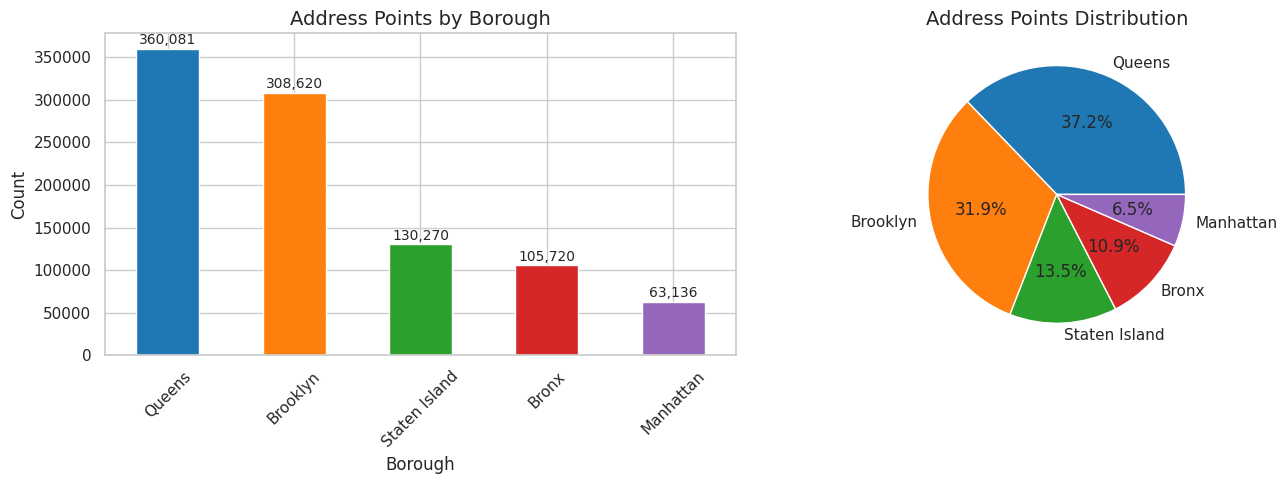

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
borough_counts.plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('Address Points by Borough', fontsize=14)
axes[0].set_xlabel('Borough')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(borough_counts.values):
    axes[0].text(i, v + 5000, f'{v:,}', ha='center', fontsize=10)

# Pie chart
axes[1].pie(borough_counts.values, labels=borough_counts.index, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Address Points Distribution', fontsize=14)

plt.tight_layout()
plt.show()

## 4. ZIP Code Analysis

In [10]:
# ZIP code statistics
zipcode_counts = df['zipcode'].value_counts()
print(f"Unique ZIP codes: {len(zipcode_counts)}")
print(f"\nTop 10 ZIP codes by address count:")
print(zipcode_counts.head(10))

Unique ZIP codes: 232

Top 10 ZIP codes by address count:
zipcode
10314    24390
11234    21159
10312    19106
10306    16839
11236    16524
11385    15309
11229    12966
11203    12348
10469    12127
11208    12116
Name: count, dtype: int64


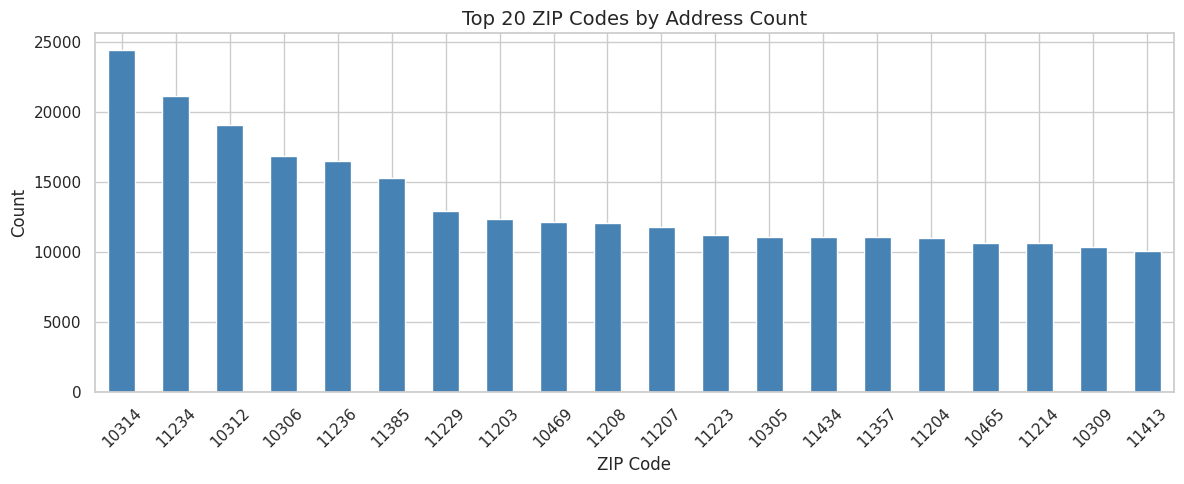

In [11]:
# ZIP code distribution
fig, ax = plt.subplots(figsize=(12, 5))

zipcode_counts.head(20).plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Top 20 ZIP Codes by Address Count', fontsize=14)
ax.set_xlabel('ZIP Code')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

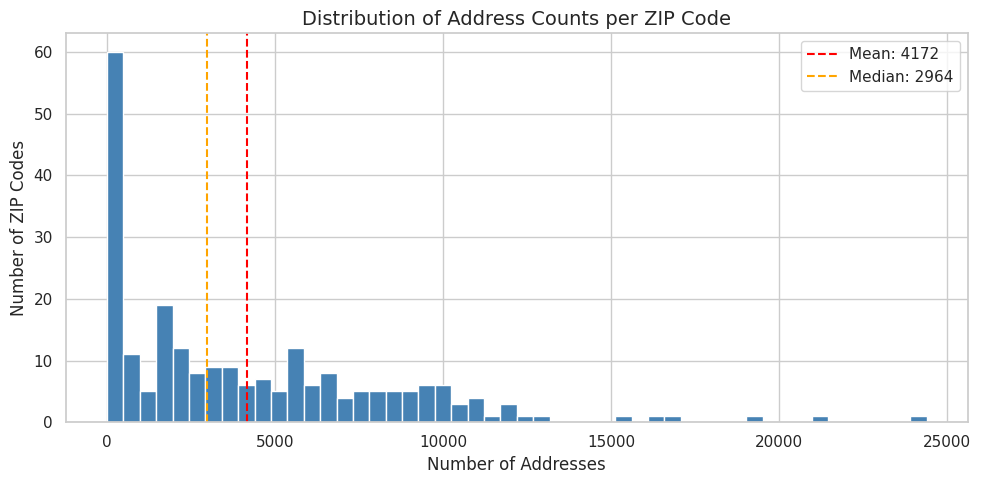

In [12]:
# Addresses per ZIP code histogram
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(zipcode_counts.values, bins=50, color='steelblue', edgecolor='white')
ax.set_title('Distribution of Address Counts per ZIP Code', fontsize=14)
ax.set_xlabel('Number of Addresses')
ax.set_ylabel('Number of ZIP Codes')
ax.axvline(zipcode_counts.mean(), color='red', linestyle='--', label=f'Mean: {zipcode_counts.mean():.0f}')
ax.axvline(zipcode_counts.median(), color='orange', linestyle='--', label=f'Median: {zipcode_counts.median():.0f}')
ax.legend()

plt.tight_layout()
plt.show()

## 5. Street Name Analysis

In [14]:
# Street name statistics
street_counts = df['full_street_name'].value_counts()
print(f"Unique street names: {len(street_counts):,}")
print(f"\nTop 20 most common streets:")
print(street_counts.head(20))

Unique street names: 8,182

Top 20 most common streets:
full_street_name
BROADWAY        3965
3 AVE           2617
79 ST           2525
78 ST           2500
5 AVE           2469
BEDFORD AVE     2393
80 ST           2307
JAMAICA AVE     2206
77 ST           2189
76 ST           2140
86 ST           2004
81 ST           1947
84 ST           1936
LINDEN BLVD     1844
82 ST           1825
72 ST           1793
83 ST           1780
NOSTRAND AVE    1769
74 ST           1753
HILLSIDE AVE    1731
Name: count, dtype: int64


In [15]:
# Post type distribution (ST, AVE, BLVD, etc.)
post_type_counts = df['post_type'].value_counts()
print("Street suffix types:")
print(post_type_counts)

Street suffix types:
post_type
ST      448449
AVE     327213
RD       45027
PL       35725
BLVD     27998
DR       13027
LN       11395
CT       11150
PKWY      9014
TER       3025
LOOP      2991
EXPY      1838
PARK      1782
CRES      1270
WAY       1243
WALK      1165
CIR       1129
HWY       1010
TPKE       988
GRN        851
CONC       523
PLZ        427
SQ         324
PROM       117
TRL         95
OVAL        92
HTS         77
PATH        70
CV          68
PT          49
VLG         47
MEWS        45
TRWY        45
ALY         43
SLIP        42
RDG         38
CRSE        33
ROW         31
CLOS        18
CP          16
ESPL        14
DY          12
GDNS        12
MALL        10
FWY          9
CMNS         8
HL           2
GLN          2
BCH          1
EST          1
BRG          1
CTR          1
Name: count, dtype: int64


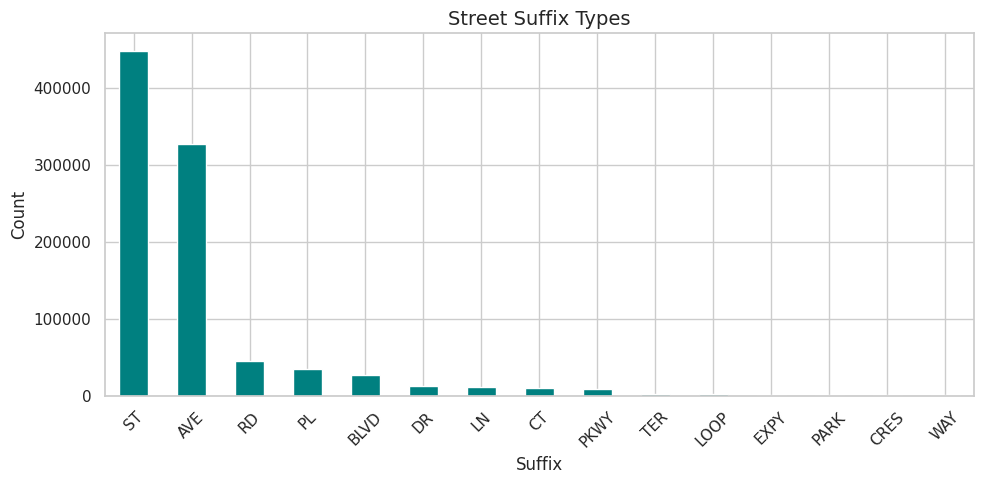

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))

post_type_counts.head(15).plot(kind='bar', ax=ax, color='teal')
ax.set_title('Street Suffix Types', fontsize=14)
ax.set_xlabel('Suffix')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6. House Number Analysis

In [17]:
# Sample house numbers
print("Sample house numbers:")
print(df['house_number'].sample(20).tolist())

Sample house numbers:
['67', '197-50', '7758', '2745', '4013', '161', '1491', '2916', '89-17', '703', '39-21', '1323', '508', '85-20', '21', '269', '260', '221', '266', '87-20']


In [18]:
# Numeric house numbers (for those that are purely numeric)
df['house_number_numeric'] = pd.to_numeric(df['house_number'], errors='coerce')
numeric_mask = df['house_number_numeric'].notna()

print(f"Purely numeric house numbers: {numeric_mask.sum():,} ({numeric_mask.sum()/len(df)*100:.1f}%)")
print(f"Non-numeric house numbers: {(~numeric_mask).sum():,} ({(~numeric_mask).sum()/len(df)*100:.1f}%)")

Purely numeric house numbers: 626,914 (64.8%)
Non-numeric house numbers: 340,913 (35.2%)


In [19]:
# Examples of non-numeric house numbers
print("Examples of non-numeric house numbers:")
print(df[~numeric_mask]['house_number'].value_counts().head(20))

Examples of non-numeric house numbers:
house_number
86-15     115
89-14     114
88-11     114
89-11     113
88-15     111
89-02     110
85-15     107
147-11    106
88-14     104
89-18     104
89-20     103
88-17     103
32-15     103
89-17     102
89-10     102
90-15     100
89-01     100
89-15      99
147-15     98
90-20      98
Name: count, dtype: int64


## 7. Coordinate Bounds

In [20]:
# Geographic bounds
print("Coordinate Statistics:")
print(f"Latitude:  min={df['latitude'].min():.6f}, max={df['latitude'].max():.6f}")
print(f"Longitude: min={df['longitude'].min():.6f}, max={df['longitude'].max():.6f}")
print(f"\nCenter point: ({df['latitude'].mean():.6f}, {df['longitude'].mean():.6f})")

Coordinate Statistics:
Latitude:  min=40.498588, max=40.913845
Longitude: min=-74.255145, max=-73.700240

Center point: (40.695248, -73.920435)


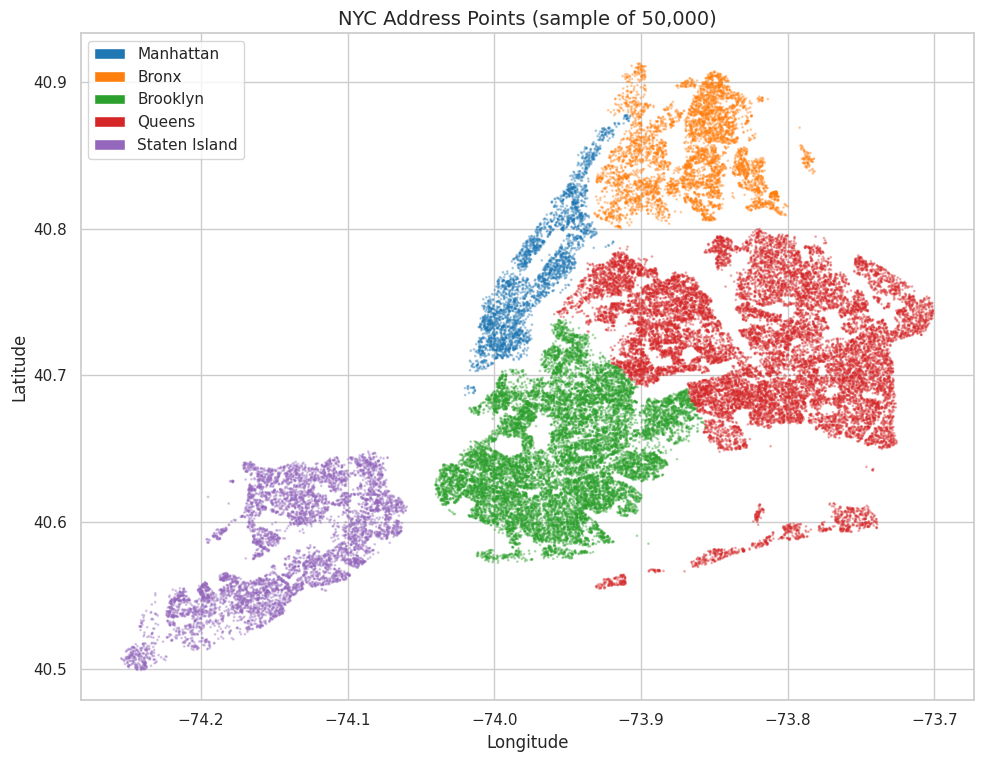

In [21]:
# Scatter plot of coordinates (sampled for performance)
sample_size = 50000
sample_df = df.sample(n=min(sample_size, len(df)), random_state=42)

fig, ax = plt.subplots(figsize=(10, 12))

colors = sample_df['borough_name'].map({
    'Manhattan': '#1f77b4',
    'Bronx': '#ff7f0e',
    'Brooklyn': '#2ca02c',
    'Queens': '#d62728',
    'Staten Island': '#9467bd'
})

ax.scatter(sample_df['longitude'], sample_df['latitude'], c=colors, alpha=0.3, s=1)
ax.set_title(f'NYC Address Points (sample of {sample_size:,})', fontsize=14)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal')

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#1f77b4', label='Manhattan'),
    Patch(facecolor='#ff7f0e', label='Bronx'),
    Patch(facecolor='#2ca02c', label='Brooklyn'),
    Patch(facecolor='#d62728', label='Queens'),
    Patch(facecolor='#9467bd', label='Staten Island')
]
ax.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()

## 8. Data Quality Summary

In [22]:
print("=" * 50)
print("DATA QUALITY SUMMARY")
print("=" * 50)
print(f"Total records: {len(df):,}")
print(f"Unique boroughs: {df['boroughcode'].nunique()}")
print(f"Unique ZIP codes: {df['zipcode'].nunique()}")
print(f"Unique street names: {df['full_street_name'].nunique():,}")
print(f"\nComplete address records: {df[['house_number', 'street_name', 'zipcode', 'latitude', 'longitude']].notna().all(axis=1).sum():,}")
print(f"Records with coordinates: {df[['latitude', 'longitude']].notna().all(axis=1).sum():,}")

DATA QUALITY SUMMARY
Total records: 967,827
Unique boroughs: 5
Unique ZIP codes: 232
Unique street names: 8,182

Complete address records: 967,823
Records with coordinates: 967,827


In [23]:
# Build full address string from components
# Format: "house_number full_street_name, borough_name, NY zipcode"

def build_address(row) -> str:
    """Construct a full address string from components."""
    parts = [
        str(row['house_number']),
        str(row['full_street_name']),
    ]
    street = ' '.join(parts)
    
    city = row['borough_name'] if pd.notna(row['borough_name']) else 'New York'
    zipcode = str(row['zipcode']) if pd.notna(row['zipcode']) else ''
    
    return f"{street}, {city}, NY {zipcode}".strip()

df['address'] = df.apply(build_address, axis=1)

# Preview addresses
print("Sample addresses:")
print(df['address'].sample(10, random_state=42).tolist())

# Select columns for output
output_cols = [
    # Full address
    'address',
    # Address components
    'house_number',
    'street_name',
    'full_street_name',
    'zipcode',
    # Borough
    'boroughcode',
    'borough_name',
    # Coordinates
    'latitude',
    'longitude',
]

output_df = df[output_cols].copy()

print(f"\nOutput DataFrame shape: {output_df.shape}")
print(f"Columns: {output_df.columns.tolist()}")
output_df.head()

Sample addresses:
['107-78 101 ST, Queens, NY 11417', '228 93 ST, Brooklyn, NY 11209', '156 RICHMOND ST, Brooklyn, NY 11208', '47-16 244 ST, Queens, NY 11362', '166 BRIGHTON 11 ST, Brooklyn, NY 11235', '45-61 159 ST, Queens, NY 11358', '130-11 LIBERTY AVE, Queens, NY 11419', '254 FRANKLIN AVE, Staten Island, NY 10301', '185 SWINNERTON ST, Staten Island, NY 10307', '39-11 MAIN ST, Queens, NY 11354']

Output DataFrame shape: (967827, 9)
Columns: ['address', 'house_number', 'street_name', 'full_street_name', 'zipcode', 'boroughcode', 'borough_name', 'latitude', 'longitude']


,address,house_number,street_name,full_street_name,zipcode,boroughcode,borough_name,latitude,longitude
0,"852 HART ST, Brooklyn, NY 11237",852,HART,HART ST,11237,3,Brooklyn,40.702298,-73.922229
1,"127 3 PL, Brooklyn, NY 11231",127,3,3 PL,11231,3,Brooklyn,40.678513,-73.996391
2,"2078 E 1 ST, Brooklyn, NY 11223",2078,1,E 1 ST,11223,3,Brooklyn,40.597941,-73.970844
3,"330 2 ST, Brooklyn, NY 11215",330,2,2 ST,11215,3,Brooklyn,40.673909,-73.984120
4,"460 6 ST, Brooklyn, NY 11215",460,6,6 ST,11215,3,Brooklyn,40.669054,-73.981063


In [24]:
# Save processed DataFrame for geocoding model
output_path = Path("../data/nyc_geocoding_processed.parquet")
output_df.to_parquet(output_path, index=False)

file_size_mb = output_path.stat().st_size / 1e6
print(f"Saved to {output_path}")
print(f"File size: {file_size_mb:.1f} MB")
print(f"Records: {len(output_df):,}")

Saved to ../data/nyc_geocoding_processed.parquet
File size: 38.3 MB
Records: 967,827
